In [ ]:
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

plt.rcParams.update({'font.size': 22})
tfd = tfp.distributions

In [ ]:
def create_dataset(n, x_range):
    x_uniform_dist = tfd.Uniform(low=x_range[0], high=x_range[1])
    x = x_uniform_dist.sample(n).numpy() [:, np.newaxis] 
    y_true = 2.7*x+3
    eps_uniform_dist = tfd.Normal(loc=0, scale=1)
    eps = eps_uniform_dist.sample(n).numpy() [:, np.newaxis] *0.74*x
    y = y_true + eps
    return x, y, y_true

In [ ]:
x_train, y_train, y_true = create_dataset(2000, [-10, 10])
x_val, y_val, _ = create_dataset(500, [-10, 10])

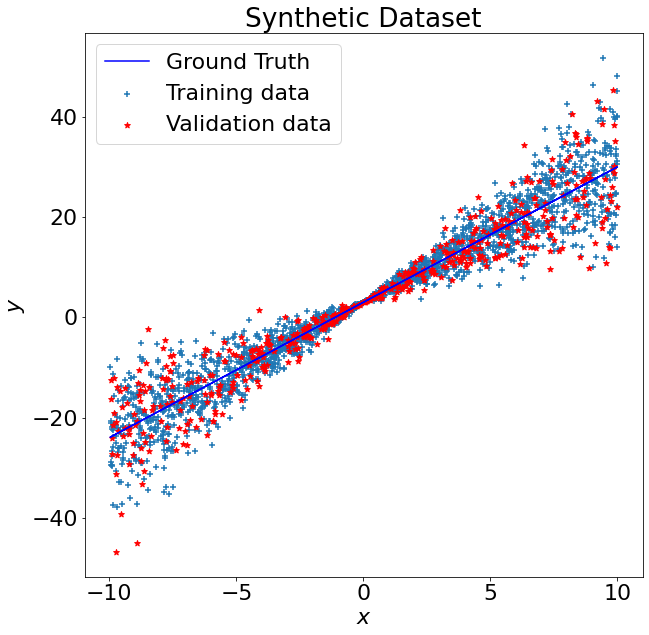

In [ ]:
def plot_dataset(x_train, y_train, x_val, y_val, y_true, title):
    fig = plt.figure(figsize = (10, 10))
    plt.scatter(x_train, y_train, marker='+', label='Training data')
    plt.scatter(x_val, y_val, marker='*', color='r', label='Validation data')
    plt.plot(x_train, y_true, color='b', label='Ground Truth')
    plt.title(title)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.show()

plot_dataset(x_train, y_train, x_val, y_val, y_true, 'Synthetic Dataset')

In [ ]:
x_test = np.linspace(-10, 10, 1000).reshape(-1, 1)

In [ ]:
# Model Architecture
model = Sequential([Dense(1, input_shape=(1,))])

# Compile 
model.compile(loss='mse', optimizer='adam')

# Fit
model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
63/63 [==============================] - 0s 1ms/step - loss: 287.2340
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 275.7011
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 264.5338
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 253.7497
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 243.3042
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 233.2276
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 223.4946
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 214.0521
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 204.9598
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 196.1727
Epoch 11/100
63/63 [==============================] - 0s 1ms/step - loss: 187.7205
Epoch 12/100
63/63 [==============================] - 0s 1ms/step - loss: 179.5483
Epoch 13/100


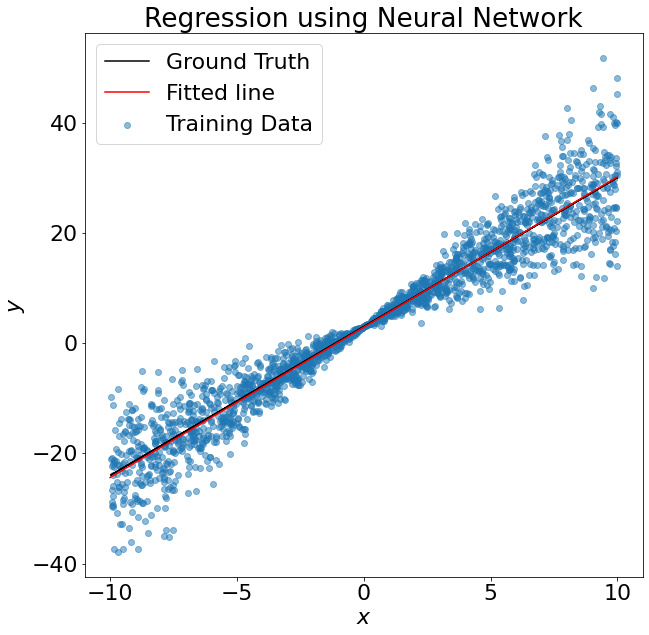

In [ ]:
y_pred = model(x_test)

# Plot the data and a trained regression line
plt.figure(figsize=(10, 10))
plt.scatter(x_train, y_train, alpha=.5, label='Training Data')
plt.plot(x_train, y_true, color='k', label='Ground Truth')
plt.plot(x_test, y_pred, label='Fitted line', c='r')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Regression using Neural Network')
plt.legend()
plt.show()

In [ ]:
model = Sequential([Dense(2, input_shape = (1,)),
    tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t[..., :1], scale=0.3+tf.math.abs(t[...,1:])))
])

In [ ]:
# Define negative loglikelihood loss function
def neg_loglik(y_true, y_pred):
    return -y_pred.log_prob(y_true)

In [ ]:
model.compile(loss=neg_loglik, optimizer='adam')

# Fit
model.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
63/63 [==============================] - 1s 1ms/step - loss: 9.2768
Epoch 2/500
63/63 [==============================] - 0s 2ms/step - loss: 8.5041
Epoch 3/500
63/63 [==============================] - 0s 1ms/step - loss: 7.9006
Epoch 4/500
63/63 [==============================] - 0s 1ms/step - loss: 7.4155
Epoch 5/500
63/63 [==============================] - 0s 2ms/step - loss: 7.0041
Epoch 6/500
63/63 [==============================] - 0s 1ms/step - loss: 6.6567
Epoch 7/500
63/63 [==============================] - 0s 1ms/step - loss: 6.3655
Epoch 8/500
63/63 [==============================] - 0s 1ms/step - loss: 6.1077
Epoch 9/500
63/63 [==============================] - 0s 1ms/step - loss: 5.8871
Epoch 10/500
63/63 [==============================] - 0s 1ms/step - loss: 5.6918
Epoch 11/500
63/63 [==============================] - 0s 1ms/step - loss: 5.5209
Epoch 12/500
63/63 [==============================] - 0s 1ms/step - loss: 5.3717
Epoch 13/500
63/63 [=================

In [ ]:
# Summary Statistics
y_mean = model(x_test).mean()
y_std = model(x_test).stddev()

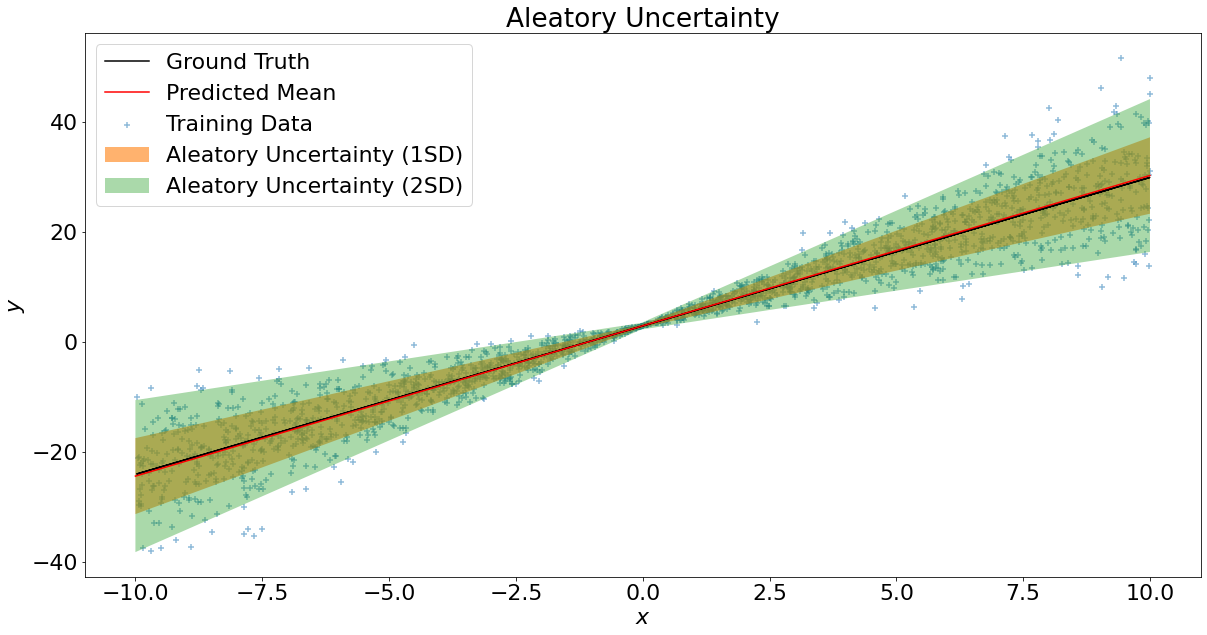

In [ ]:
fig = plt.figure(figsize = (20, 10))
plt.scatter(x_train, y_train, marker='+', label='Training Data', alpha=0.5)
plt.plot(x_train, y_true, color='k', label='Ground Truth')
plt.plot(x_test, y_mean, color='r', label='Predicted Mean')
plt.fill_between(np.squeeze(x_test), np.squeeze(y_mean+1*y_std), np.squeeze(y_mean-1*y_std),  alpha=0.6, label='Aleatory Uncertainty (1SD)')
plt.fill_between(np.squeeze(x_test), np.squeeze(y_mean+2*y_std), np.squeeze(y_mean-2*y_std),  alpha=0.4, label='Aleatory Uncertainty (2SD)')
plt.title('Aleatory Uncertainty')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()